# <font color='orange'> BACCHANAL BUFFET ANALYSIS

<img src='image.jpg'>

## <font color='orange'> Introduction
- **<font color='orange'>Business Need** Improving services and customers satisfy for Bacchanal Buffet.
- **<font color='orange'>Solution:** Using Yelp, Foursquare and Twitter data, Analyse Reviews, Customer’s Sentiment and provide suggestions.
- **<font color='orange'>Objectives:**
    -  NLP Supervised Classification on Yelp Dataset
    -  Sentiment Analysis on Yelp Dataset
    -  Scraping Foursquare Dataset and Building Sentiment Analysis
    -  Getting Tweets about business and Building Sentiment Analysis.
    -  Compare Results

## <font color='orange'> Requirements

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## <font color='orange'> Import Data

In [7]:
df=pd.read_csv('restaurant.csv')

In [8]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


## <font color='orange'> EDA (Exploratory Data Analysis)

In [10]:
df.sample(3)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3287,2617788,pho1PBHPvzlsfaXckh3gwQ,OAOYdKgdWRAZ2b0GRMAQiA,RESDUcs7fIiihp38-d6_6g,4,0,0,0,Probably one of the most popular buffets in Ve...,2017-05-30 19:31:22
1296,2468045,pCMXJ7LWD_Dhcjn1sE2dNg,uARgL6GaLmh1fO5iGWDAEw,RESDUcs7fIiihp38-d6_6g,4,0,0,0,"Excellent buffet. Went during dinner, and tri...",2017-08-17 21:43:01
4934,2744334,9V9VknzOiJ49clyJqnKxUw,m-Fh2xibpw_u0rQcKv6_Og,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Got there at 5 pm on a Friday night and the li...,2012-09-22 20:12:47


In [11]:
df.shape

(10417, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10417.0,2.775377e+06,242865.449095,2370338.0,2566392.0,2762536.0,2975480.0,3220316.0
stars,10417.0,3.777671e+00,1.331451,1.0,3.0,4.0,5.0,5.0
useful,10417.0,1.419603e+00,4.875888,0.0,0.0,0.0,1.0,176.0
funny,10417.0,6.408755e-01,3.347964,0.0,0.0,0.0,0.0,159.0
cool,10417.0,7.597197e-01,4.125847,0.0,0.0,0.0,0.0,172.0


In [14]:
df['stars'].unique()

array([5, 4, 1, 3, 2], dtype=int64)

In [15]:
df['stars'].value_counts()

stars
5    4247
4    2636
3    1561
1    1056
2     917
Name: count, dtype: int64

## <font color='orange'> Data Visualization

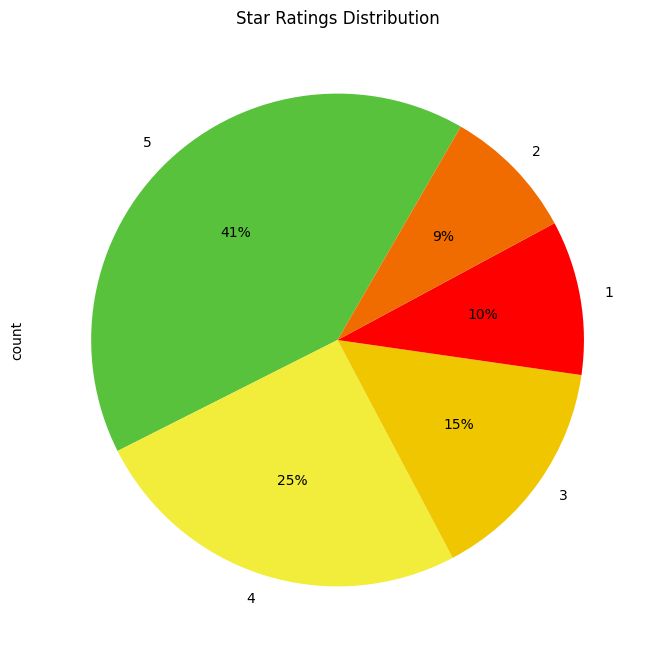

In [17]:
custom_colors = ['#58C23D', '#F2EC3A', '#F0C601', '#FF0000','#F06C00']
df.stars.value_counts().plot.pie(autopct='%1.0f%%',startangle=60,colors=custom_colors, figsize=(8, 8))
plt.title('Star Ratings Distribution');

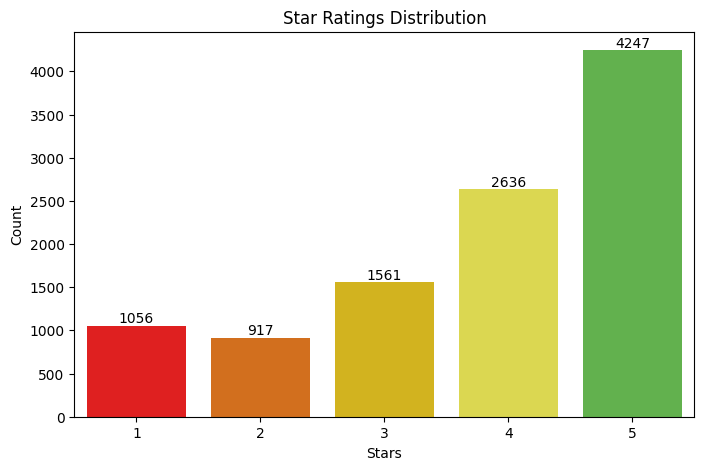

In [18]:
plt.figure(figsize=(8, 5))
star_counts = df['stars'].value_counts().sort_index()
custom_colors = ['#FF0000', '#F06C00', '#F0C601', '#F2EC3A', '#58C23D']
ax=sns.barplot(x=star_counts.index, y=star_counts.values, palette=custom_colors)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Star Ratings Distribution');

## <font color='orange'> Feature Engineering - Text Processing

In [20]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1962,2518239,nakX_zyMCKe-2P7kNlExiQ,OSucUM_bOvY63bldpGE61Q,RESDUcs7fIiihp38-d6_6g,2,0,0,0,食物真的很差。要排隊三個小時。以他的聲譽來說每位500元的價錢不算貴。不過進到去真是大吃一驚...,2015-12-24 04:49:44
4817,2734747,YF0C6a-yZKlK-tVH5GRB_A,xoWBO-Q8eggololQumtC_Q,RESDUcs7fIiihp38-d6_6g,4,1,0,0,I went to this buffet on Saturday 10/20/2012 a...,2012-10-22 19:22:59
7546,2954608,Z2YaOIG7aNL416Hyvs7oUw,ge6HFhc8hbt0Sy0M_jfZHw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Came here on vacation and the food amazing, hu...",2012-10-31 07:54:35
10370,3215811,yerr-dS7WMHhIrO3p3e7hg,a9UymHuKxZKMnHXOo3nLKA,RESDUcs7fIiihp38-d6_6g,4,5,0,3,This place is insane!!!! I can't believe I've ...,2017-12-05 00:28:30
5685,2798945,uGeCboGY2vccQ1FbHWpUWw,hFCUoOVs1rA4FX9Vps9fsg,RESDUcs7fIiihp38-d6_6g,4,4,0,0,The assortment and quality of the buffet food ...,2016-01-03 03:17:20


In [21]:
# extract necessary columns
new_df=df[['stars','text']]

### <font color='orange'> Detecting Language

In [23]:
#pip install langdetect

In [24]:
from langdetect import detect

In [25]:
# Detect Language, and select all texts that are NOT english
nonen=new_df[new_df['text'].apply(detect)!='en']

In [26]:
nonen.head()

,stars,text
195,1,真心不怎么样 中午没有雪蟹腿\n菜都很一般\n港式点心说的过去其他的中式菜只能说尚且入口\n...
464,5,Die Auswahl ist gigantisch. Es gibt verschiede...
806,4,Wait wait wait wait wait wait wait....pay....w...
864,3,談到位於賭城的自助餐，十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 Caesa...
1370,3,没有做好功课，千辛万苦找到才发现CES期间的晚餐要近60刀，都想打退堂鼓了。\n\n其实拉斯...


In [27]:
# Select all texts that are english
df_eng=new_df[new_df['text'].apply(detect)=='en']

In [28]:
df_eng.head()

,stars,text
0,5,After getting food poisoning at the Palms hote...
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,The crab legs are better than the ones at Wick...
3,1,Not worth it! Too salty food and expensive! Th...
4,5,I would give this infinite stars if I could. M...


### <font color='orange'> Removing Characters

In [30]:
# lowering characters
df_eng['text']=df_eng['text'].str.lower()

In [31]:
df_eng['text'].sample(2)

93      came here tonight for the buffet. everything s...
7886    lucked out the day we came because there was n...
Name: text, dtype: object

In [32]:
# Removing punctuations
df_eng['text']=df_eng['text'].str.replace('[^\w\s]','',regex=True)
# Removing numerical values
df_eng['text']=df_eng['text'].str.replace('[\d+]','',regex=True)
# Removing newline 
df_eng['text']=df_eng['text'].str.replace('[\n]','',regex=True)
# Removing carriage return
df_eng['text']=df_eng['text'].str.replace('[\r]','',regex=True)

In [33]:
df_eng['text'].sample(2)

4242    please lower your expectations when you come h...
4211    best buffet on the stripdidnt like paying holi...
Name: text, dtype: object

## <font color='orange'> Sentiment Analysis

In [35]:
from textblob import TextBlob

In [36]:
df_eng['polarity']=df_eng['text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df_eng['subjectivity']=df_eng['text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [142]:
df_eng.sample(2)

,stars,text,polarity,subjectivity,sentiment,tokenize,stemmed,join,text_word_count
9469,2,there are some reasons that this place is wort...,0.113333,0.446667,negative,"[there, are, some, reasons, that, this, place,...","[there, are, some, reason, that, this, place, ...",there are some reason that this place is worth...,292
514,5,this might be my new place to go to for the bu...,0.134740,0.736753,positive,"[this, might, be, my, new, place, to, go, to, ...","[this, might, be, my, new, place, to, go, to, ...",this might be my new place to go to for the bu...,118


In [38]:
df_eng.loc[df_eng['stars'] >3 ,'sentiment'] = 'positive'
df_eng.loc[df_eng['stars'] ==3 ,'sentiment'] = 'neutral'
df_eng.loc[df_eng['stars'] < 3, 'sentiment'] = 'negative'

In [39]:
df_eng.sample(2)

,stars,text,polarity,subjectivity,sentiment
4871,4,this buffet is located in ceasars palace dont ...,0.055556,0.527778,positive
6044,1,if you want a lot of selection of below medioc...,-0.001852,0.429630,negative


## <font color='orange'> Applying Lemmatization

In [41]:
import nltk
from nltk.stem import SnowballStemmer
df_eng['text']=df_eng['text'].str.replace('[^a-zA-Z]',' ')
df_eng['tokenize']=df_eng['text'].apply(lambda x: nltk.word_tokenize(x))

In [42]:
print(df_eng['tokenize'][0])

['after', 'getting', 'food', 'poisoning', 'at', 'the', 'palms', 'hotel', 'i', 'was', 'scared', 'to', 'eat', 'at', 'any', 'more', 'buffets', 'but', 'we', 'figured', 'with', 'the', 'high', 'price', 'tag', 'the', 'positive', 'reviews', 'etc', 'it', 'was', 'worth', 'a', 'chance', 'im', 'really', 'glad', 'we', 'gave', 'it', 'a', 'try', 'btw', 'i', 'uploaded', 'a', 'collage', 'of', 'the', 'things', 'we', 'atethe', 'seafood', 'line', 'is', 'by', 'the', 'far', 'the', 'longest', 'i', 'would', 'not', 'recommend', 'showing', 'up', 'in', 'heels', 'if', 'youre', 'female', 'my', 'feet', 'were', 'killing', 'me', 'between', 'the', 'line', 'at', 'the', 'door', 'the', 'line', 'to', 'get', 'sat', 'and', 'the', 'seafood', 'line', 'totally', 'worth', 'it', 'thoughthe', 'prime', 'rib', 'was', 'the', 'best', 'ive', 'ever', 'hadi', 'loved', 'the', 'sweet', 'potato', 'totsi', 'even', 'have', 'phothe', 'music', 'was', 'great', 'and', 'so', 'was', 'our', 'server', 'alma', 'he', 'was', 'a', 'older', 'gentleman', 

In [43]:
engStemmer=SnowballStemmer('english')

In [44]:
df_eng['stemmed'] = df_eng['tokenize'].apply(lambda x: [engStemmer.stem(word) for word in x])

In [45]:
print(df_eng['stemmed'][0])

['after', 'get', 'food', 'poison', 'at', 'the', 'palm', 'hotel', 'i', 'was', 'scare', 'to', 'eat', 'at', 'ani', 'more', 'buffet', 'but', 'we', 'figur', 'with', 'the', 'high', 'price', 'tag', 'the', 'posit', 'review', 'etc', 'it', 'was', 'worth', 'a', 'chanc', 'im', 'realli', 'glad', 'we', 'gave', 'it', 'a', 'tri', 'btw', 'i', 'upload', 'a', 'collag', 'of', 'the', 'thing', 'we', 'ateth', 'seafood', 'line', 'is', 'by', 'the', 'far', 'the', 'longest', 'i', 'would', 'not', 'recommend', 'show', 'up', 'in', 'heel', 'if', 'your', 'femal', 'my', 'feet', 'were', 'kill', 'me', 'between', 'the', 'line', 'at', 'the', 'door', 'the', 'line', 'to', 'get', 'sat', 'and', 'the', 'seafood', 'line', 'total', 'worth', 'it', 'thoughth', 'prime', 'rib', 'was', 'the', 'best', 'ive', 'ever', 'hadi', 'love', 'the', 'sweet', 'potato', 'totsi', 'even', 'have', 'photh', 'music', 'was', 'great', 'and', 'so', 'was', 'our', 'server', 'alma', 'he', 'was', 'a', 'older', 'gentleman', 'with', 'a', 'mustach', 'and', 'was'

In [46]:
df_eng['join']=df_eng['stemmed'].apply(lambda x:' '.join(x))

In [47]:
df_eng['join'][0]

'after get food poison at the palm hotel i was scare to eat at ani more buffet but we figur with the high price tag the posit review etc it was worth a chanc im realli glad we gave it a tri btw i upload a collag of the thing we ateth seafood line is by the far the longest i would not recommend show up in heel if your femal my feet were kill me between the line at the door the line to get sat and the seafood line total worth it thoughth prime rib was the best ive ever hadi love the sweet potato totsi even have photh music was great and so was our server alma he was a older gentleman with a mustach and was veri attent and delightfuli will return next trip in more comfort shoe after a horribl visit at the palm with non stop issu in a matter of hour your establish was truli the high light of our trip thank you for an exquisit dinner'

In [48]:
df_eng['sentiment'].value_counts()

sentiment
positive    6853
negative    1964
neutral     1557
Name: count, dtype: int64

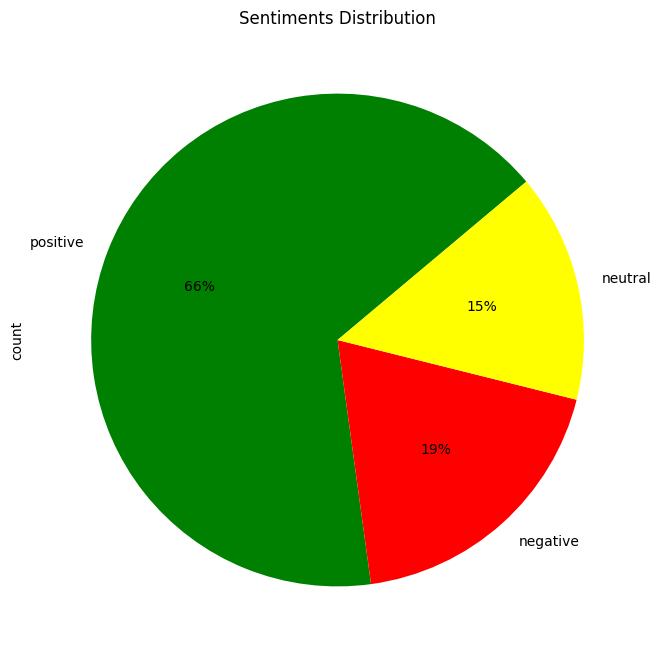

In [49]:
df_eng.sentiment.value_counts().plot.pie(autopct='%1.0f%%',startangle=40,colors=['green','red','yellow'], figsize=(8, 8))
plt.title('Sentiments Distribution');

## <font color='orange'> Word Cloud

In [51]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
def wc(data,color):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=color,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

### <font color='orange'> 5-Star

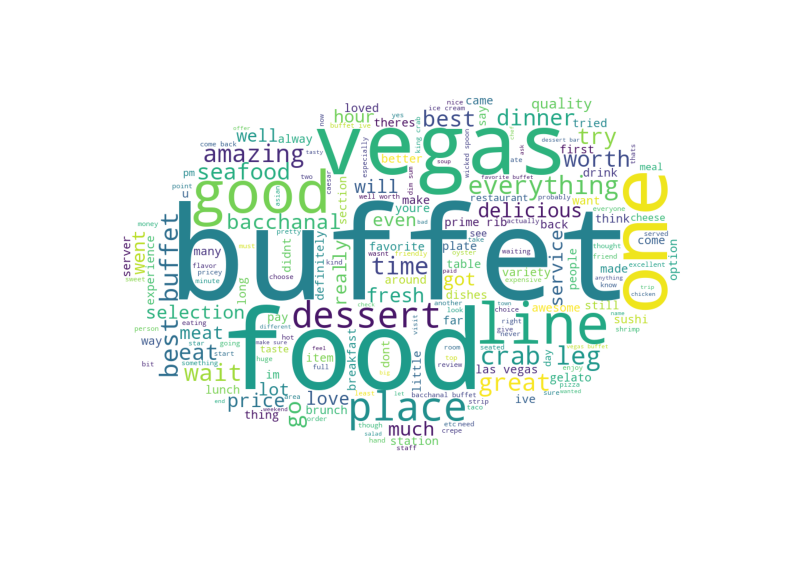

In [53]:
# find for positive reviews
wc(df_eng[df_eng['stars']==5]['text'],'white')

### <font color='orange'> 1-Star

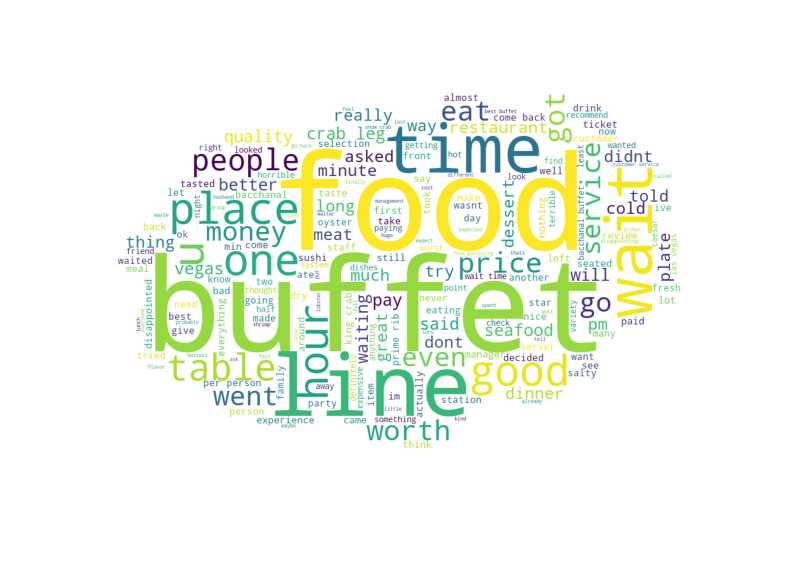

In [55]:
# find for neutral reviews
wc(df_eng[df_eng['stars']==1]['text'],'white')

### <font color='orange'> Positive

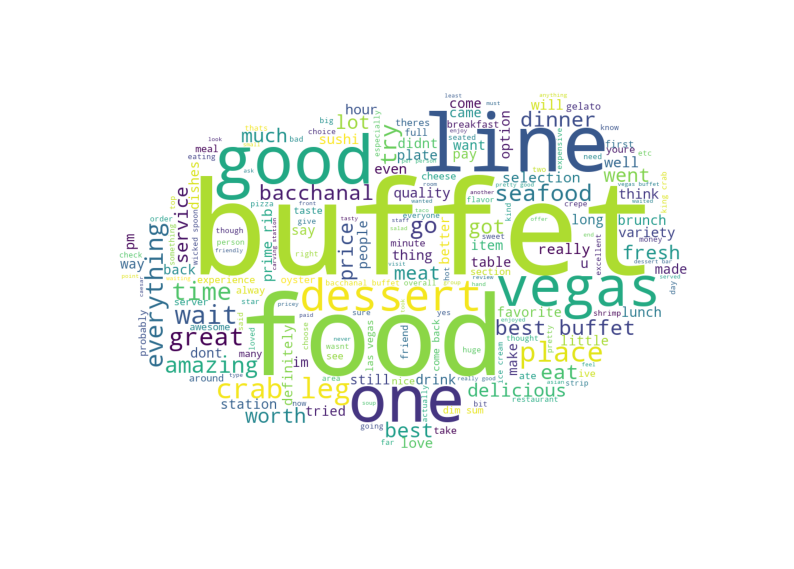

In [57]:
# find for negative reviews
wc(df_eng[df_eng['sentiment']=='positive']['text'],'white')

### <font color='orange'> Negative

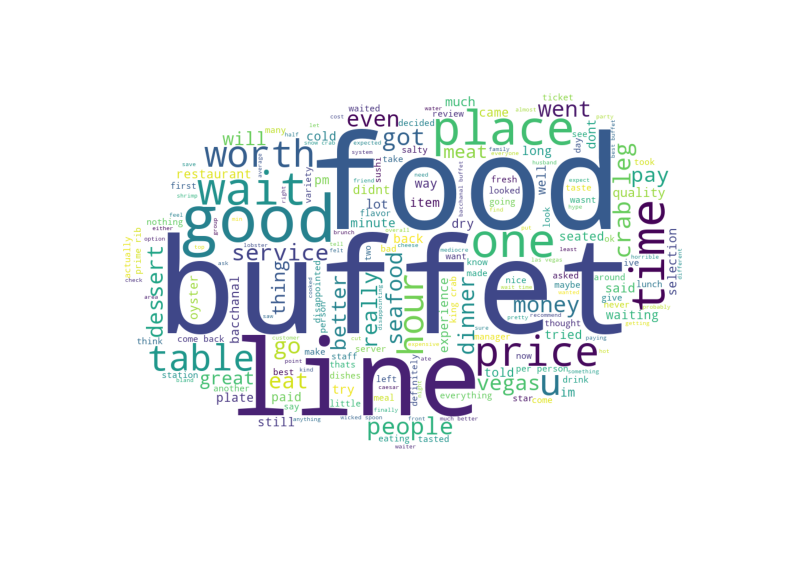

In [59]:
wc(df_eng[df_eng['sentiment']=='negative']['text'],'white')

## <font color='orange'> Positive and Negative Words

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, ngram_range=(2, 3), top_n=10):
    vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    dtm = vect.fit_transform(texts)
    ngram_counts = dtm.sum(axis=0)
    ngrams_freq = [(word, ngram_counts[0, idx]) for word, idx in vect.vocabulary_.items()]
    return sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

### <font color='orange'> Positive 2 words

In [63]:
positive_reviews = df_eng[df_eng['sentiment'] == 'positive']['join']
positive_ngrams = get_top_ngrams(positive_reviews, ngram_range=(2, 2), top_n=20)
positive_ngrams

[('crab leg', 2440),
 ('best buffet', 1584),
 ('buffet vega', 1126),
 ('prime rib', 1072),
 ('las vega', 670),
 ('bacchan buffet', 579),
 ('dim sum', 573),
 ('wick spoon', 535),
 ('ice cream', 519),
 ('king crab', 509),
 ('wait line', 443),
 ('vega buffet', 432),
 ('qualiti food', 403),
 ('buffet ive', 398),
 ('veri good', 390),
 ('varieti food', 361),
 ('pretti good', 360),
 ('dessert bar', 357),
 ('realli good', 356),
 ('wait time', 332)]

### <font color='orange'> Positive 3 words

In [65]:
positive_ngrams = get_top_ngrams(positive_reviews, ngram_range=(3,3), top_n=20)
positive_ngrams

[('best buffet vega', 496),
 ('king crab leg', 318),
 ('buffet las vega', 287),
 ('best buffet ive', 239),
 ('best buffet las', 158),
 ('snow crab leg', 157),
 ('steam crab leg', 139),
 ('worth everi penni', 126),
 ('crab leg oyster', 118),
 ('hand best buffet', 118),
 ('mochi ice cream', 116),
 ('favorit buffet vega', 116),
 ('far best buffet', 105),
 ('hot crab leg', 96),
 ('chocol cover strawberri', 96),
 ('crab leg shrimp', 94),
 ('best buffet strip', 91),
 ('probabl best buffet', 82),
 ('fresh squeez juic', 81),
 ('save room dessert', 75)]

### <font color='orange'> Negative 1 words

In [67]:
negative_reviews = df_eng[df_eng['sentiment'] == 'negative']['join']
negative_ngrams = get_top_ngrams(negative_reviews, ngram_range=(1,1), top_n=20)
negative_ngrams

[('buffet', 2901),
 ('food', 2768),
 ('wait', 1754),
 ('line', 1730),
 ('time', 1292),
 ('good', 1231),
 ('crab', 1108),
 ('like', 1094),
 ('just', 1087),
 ('price', 886),
 ('hour', 878),
 ('place', 859),
 ('veri', 839),
 ('onli', 801),
 ('tri', 786),
 ('eat', 758),
 ('better', 706),
 ('worth', 686),
 ('servic', 679),
 ('dont', 661)]

### <font color='orange'> Negative 2 words

In [69]:
negative_ngrams = get_top_ngrams(negative_reviews, ngram_range=(2, 2), top_n=20)
negative_ngrams

[('crab leg', 558),
 ('prime rib', 251),
 ('wait line', 235),
 ('king crab', 217),
 ('wait hour', 200),
 ('wick spoon', 169),
 ('buffet vega', 158),
 ('wait time', 157),
 ('tast like', 145),
 ('las vega', 144),
 ('best buffet', 143),
 ('bacchan buffet', 141),
 ('snow crab', 130),
 ('qualiti food', 126),
 ('long line', 124),
 ('onli thing', 114),
 ('hour wait', 113),
 ('veri disappoint', 108),
 ('food good', 107),
 ('line wait', 91)]

### <font color='orange'> Negative 3 words

In [71]:
negative_reviews = df_eng[df_eng['sentiment'] == 'negative']['join']
negative_ngrams = get_top_ngrams(negative_reviews, ngram_range=(3,3), top_n=20)
negative_ngrams

[('king crab leg', 94),
 ('best buffet vega', 56),
 ('snow crab leg', 44),
 ('buffet las vega', 44),
 ('wait line hour', 43),
 ('wait hour line', 27),
 ('wait long line', 22),
 ('wait anoth hour', 21),
 ('best buffet las', 21),
 ('got food poison', 20),
 ('wick spoon better', 20),
 ('dont wast money', 19),
 ('stone crab claw', 19),
 ('wast time money', 18),
 ('wait time minut', 18),
 ('meat carv station', 17),
 ('steam crab leg', 17),
 ('las vega buffet', 17),
 ('dont know whi', 17),
 ('dont wast time', 16)]

In [72]:
sentiment_counts = df_eng[df_eng['sentiment']!='neutral']['sentiment'].value_counts()

# Calculate percentages
total = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total) * 100

# Create a DataFrame for display
result = pd.DataFrame({
    'Total': sentiment_counts,
    'Percentage': sentiment_percentages.round(2)
}).reset_index()

# Rename columns for clarity
result.rename(columns={'index': 'Sentiment'}, inplace=True)
result

,sentiment,Total,Percentage
0,positive,6853,77.72
1,negative,1964,22.28


In [73]:
df_eng['text_word_count'] = df_eng['text'].apply(lambda x: len(str(x).split()))
result = df_eng.groupby('sentiment')['text_word_count'].mean().round(2)
result = result.reset_index()
result.columns = ['sentiment', 'text_word_count']
result

,sentiment,text_word_count
0,negative,145.38
1,neutral,156.81
2,positive,127.60


## <font color='orange'> Modelling

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.naive_bayes import MultinomialNB    


def classification_test(x,y,vect,confusion_mtr=False):
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    a=AdaBoostClassifier()
    m=MultinomialNB()
    algos=[b,l,d,rf,h,a,b]

    algo_names=['Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','Ada Boost Classifier','Multinomial NB']

    accuracy=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    result=pd.DataFrame(columns=['Accuracy Score'],index=algo_names)

    for i, algo in enumerate(algos):
        x_train_dtm = vect.fit_transform(x_train)
        x_test_dtm = vect.transform(x_test)

        if hasattr(algo, 'fit'):
            x_train_dtm = x_train_dtm  
            x_test_dtm = x_test_dtm   

        p = algo.fit(x_train_dtm, y_train).predict(x_test_dtm)
        accuracy.append(accuracy_score(y_test, p))
        if confusion_mtr:
            cm = confusion_matrix(y_test, p)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=algo.classes_, yticklabels=algo.classes_)
            plt.title(f"Confusion Matrix - {algo_names[i]}")
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

    result['Accuracy Score']=accuracy

    r_table=result.sort_values('Accuracy Score',ascending=False)
    
        
        
    return r_table[['Accuracy Score']]
    

In [76]:
x=df_eng['join']
y=df_eng['sentiment']

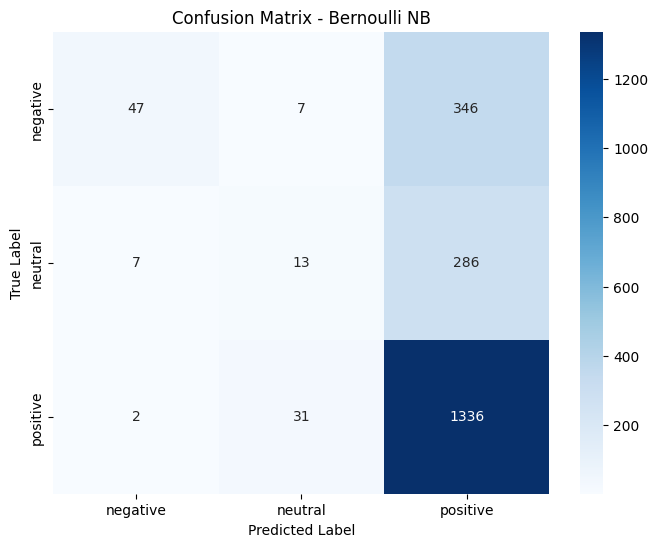

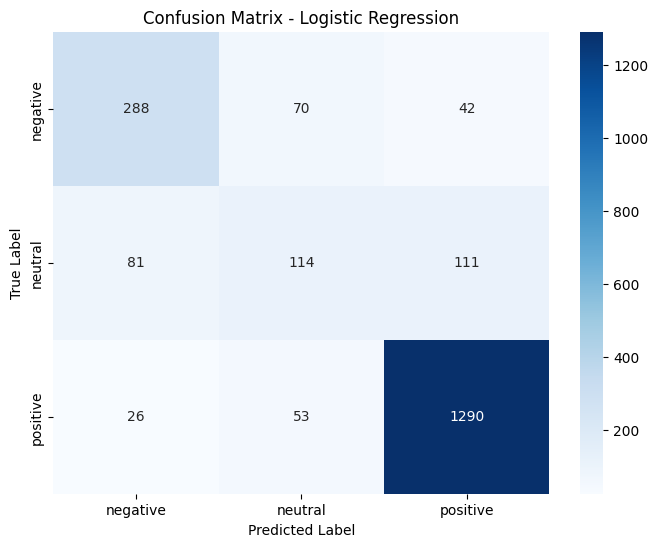

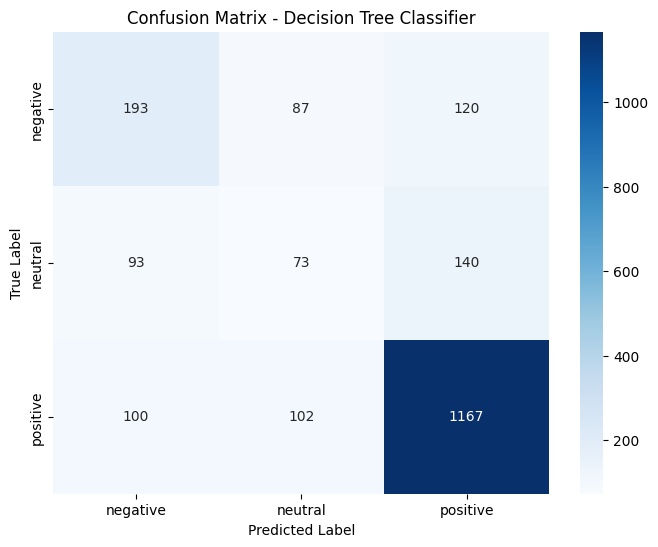

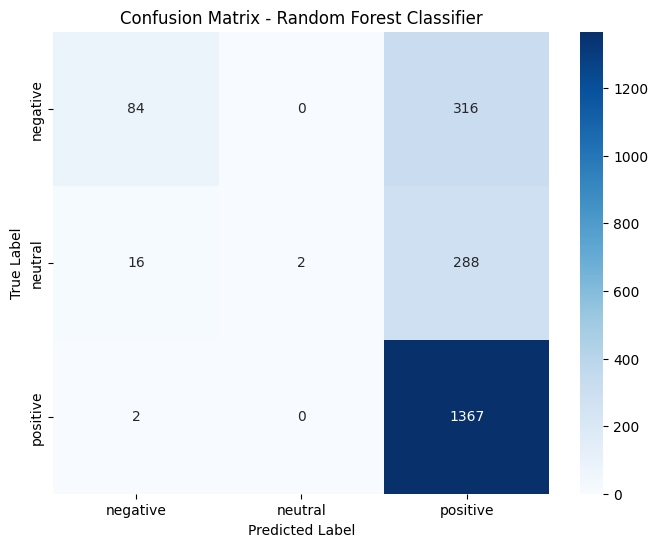

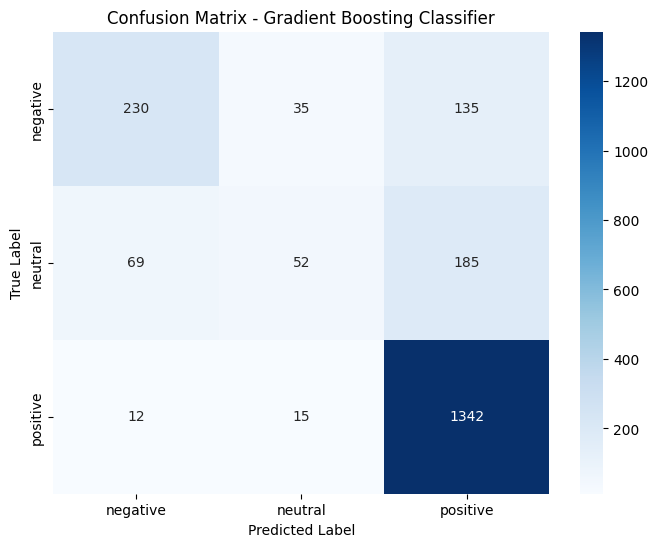

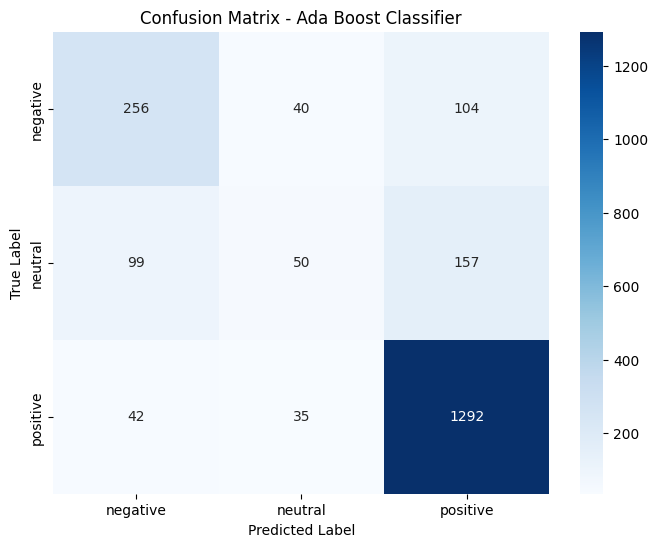

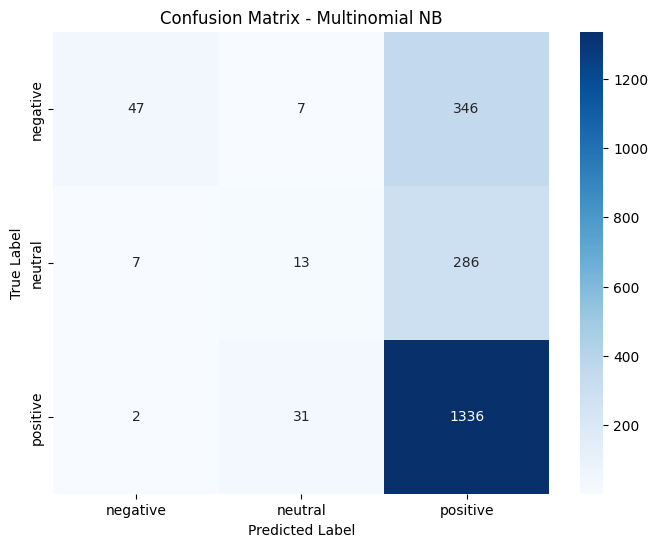

,Accuracy Score
Logistic Regression,0.815422
Gradient Boosting Classifier,0.782651
Ada Boost Classifier,0.770120
Random Forest Classifier,0.700241
Decision Tree Classifier,0.690602
Bernoulli NB,0.672771
Multinomial NB,0.672771


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2))
classification_test(x,y,vect,confusion_mtr=True)

### <font color='orange'> Pick Best Model

In [79]:
vect = CountVectorizer(ngram_range=(2,3))
l=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
model=l.fit(x_train_dtm, y_train)
predictions=model.predict(x_test_dtm)

In [80]:
accuracy_score(y_test, predictions)

0.792289156626506

In [81]:
comment=['the food was cold and very expensive even though no flavor']
comment=vect.transform(comment)
model.predict(comment)

array(['negative'], dtype=object)

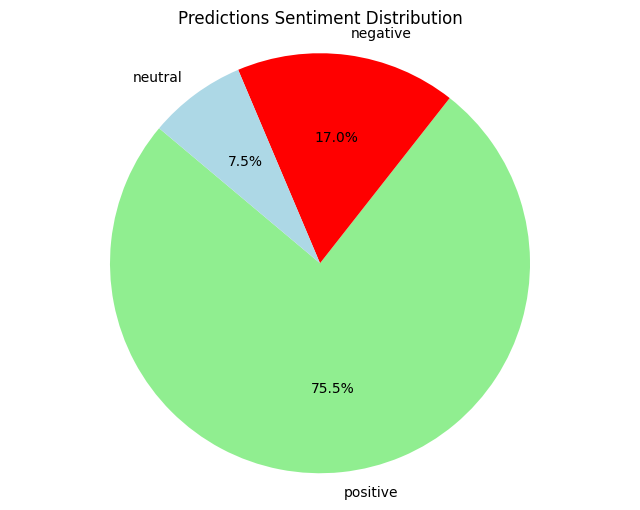

In [82]:
predictions_series = pd.Series(predictions)

predictions_counts = predictions_series.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    predictions_counts, 
    labels=predictions_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightgreen','red','lightblue']  
)
plt.title('Predictions Sentiment Distribution')
plt.axis('equal')  
plt.show()
